# Описание проекта <a class="anchor" id="chapter_1"></a>

- Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
- Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Содержание

* [Описание проекта](#chapter_1)
* [Шаг 1. Изучение исходных данных](#chapter_2)
* [Шаг 2. Подготовка данных](#chapter_3)
* [Шаг 3. Исследовательский анализ данных](#chapter_4)
    * [Шаг 3.1 Важность периодов](#chapter_4_1)
    * [Шаг 3.2 Самые востребованные платформы](#chapter_4_2)
    * [Шаг 3.3 Актуальный период](#chapter_4_3)
    * [Шаг 3.4 Построение усов](#chapter_4_4)
    * [Шаг 3.5 Корреляция между отзывами и продажами](#chapter_4_5)
    * [Шаг 3.6 Прибыльные жанры](#chapter_4_6)
* [Шаг 4. Портрет пользователя по каждому региону](#chapter_5)
    * [Шаг 4.1 ТОП-5 платформ](#chapter_5_1)
    * [Шаг 4.2 ТОП-5 жанров](#chapter_5_2)
    * [Шаг 4.3 Влияние рейтинга ESRB](#chapter_5_3)
* [Шаг 5. Проверка гипотез](#chapter_6)
* [Вывод](#chapter_7)

# Шаг 1. Изучение исходных данных <a class="anchor" id="chapter_2"></a>

Откроем и изучим исходные данные

In [1]:
#импортируем все необходимые библиотеки для проекта

import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#откроем исходный датасет

try: 
    data = pd.read_csv('/Users/abc/Documents/Courses/yandex/projects/5 - merge/games.csv', sep=',')
except:
    data = pd.read_csv('/datasets/games.csv', sep=',')

display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


__Общая информация о данных:__

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Шаг 2. Подготовка данных <a class="anchor" id="chapter_3"></a>

Обработаем данные и подготовим их для дальнейшего анализа, для этого потребуется сделать следующие действия:
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [3]:
#произведем замену верхнего регистра в названия столбцов на нижний

data.columns = data.columns.str.lower()

display(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
#преобразуем данные в нужные типы

#преобразуем год выпуска в тип int

data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

#Перед тем как заменить тип мы заменили пропуски на 0, для того чтобы можно было преобразовать в тип int,
#таким образом данные будут занимать меньше места

#Но мы знаем что 0 означает отсутствие заполненной даты релиза игры

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [5]:
#Заменим пропуски данных в столбцах critic_score

data['critic_score'] = data['critic_score'].fillna(0)
data['critic_score'] = data['critic_score'].astype('float')

data.info()
display(data.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15092,ParaWorld,PC,2006,Strategy,0.00,0.02,0.00,0.00,71.0,8.3,T
6620,Silent Hunter 5: Battle of the Atlantic,PC,2010,Simulation,0.00,0.21,0.00,0.05,62.0,3.5,T
13812,Rise of Nations,PC,2003,Strategy,0.01,0.02,0.00,0.01,89.0,9,T
16094,Space Invaders Revolution,DS,2005,Shooter,0.01,0.00,0.00,0.00,49.0,5.2,E
14944,Atari Flashback Classics: Volume 1,PS4,2016,Misc,0.02,0.00,0.00,0.00,0.0,tbd,E
14773,Loading Human,PS4,2016,Adventure,0.01,0.01,0.00,0.00,0.0,NaN,NaN
10651,Tom Clancy's Splinter Cell,GBA,2003,Action,0.07,0.03,0.00,0.00,77.0,8.6,T
3764,NASCAR 09,PS2,2008,Racing,0.26,0.20,0.00,0.07,0.0,7.9,E
8829,We Sing UK Hits,Wii,2011,Misc,0.00,0.13,0.00,0.02,0.0,tbd,T
43,Animal Crossing: Wild World,DS,2005,Simulation,2.50,3.45,5.33,0.86,86.0,8.7,E


In [6]:
#проверим две строчки у которых имена равны NaN

display(data.loc[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0.0,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0.0,NaN,NaN


In [7]:
#их можно удалить потому что они не содержат оценок и нет названий игры, а только название платформы

data = data.dropna(subset = ['name']).reset_index(drop=True)

data.info()
display(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,0.0,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,0.0,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,0.0,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,0.0,NaN,NaN
16712,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,0.0,NaN,NaN


In [8]:
# в столбце user_score кроме цифр есть другое значение

display(data.loc[data['user_score']=="tbd"].sample(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10611,My Healthy Cooking Coach,DS,0,Simulation,0.09,0.0,0.0,0.01,0.0,tbd,E
10301,Yamaha Supercross,DS,2009,Racing,0.10,0.0,0.0,0.01,0.0,tbd,E
12546,World Series of Poker 2008: Battle for the Bra...,DS,2007,Misc,0.05,0.0,0.0,0.00,0.0,tbd,T


Обычно термин tbd означает "to be determined" - подлежит определению

в нашем случае можно предположить что это значение не было еще занесено и только ожидалось, что будет дана
пользвательская оценка играм. Так как оценка не была дана, то можно заменить это значение на 0

In [9]:
#Заменин tbd на ноль

data['user_score'] = data['user_score'].replace('tbd', 0)

#заполним пустые значения нулями

data['user_score'] = data['user_score'].fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [10]:
#преобразуем оценку пользователей в тип float

data['user_score'] = data['user_score'].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [11]:
#посмотрим что за пропуски в колонке rating

display(data.loc[data['rating'].isna()].sample(4))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14205,Harukanaru Toki no Naka de Yumenoukihashi Special,PS2,2009,Adventure,0.00,0.00,0.03,0.00,0.0,0.0,NaN
11487,Black/Matrix,SAT,1998,Strategy,0.00,0.00,0.08,0.00,0.0,0.0,NaN
2259,Starsky & Hutch,PS2,2003,Racing,0.45,0.35,0.00,0.12,0.0,0.0,NaN
9724,M&M's Kart Racing,DS,2008,Racing,0.11,0.00,0.00,0.01,0.0,0.0,NaN



Так как оценок у этих игр нет, соответственно и рейтинга у них не будет. Поэтому заполним пропуски нулями

In [12]:
#заполним пропуски в rating нулями

data['rating'] = data['rating'].fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
# теперь избавимся от явных дубликатов

data = data.drop_duplicates()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [14]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

data['sum_sales'] = data.loc[:,['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38


# Шаг 3. Исследовательский анализ данных <a class="anchor" id="chapter_4"></a>

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

## Шаг 3.1 Важность периодов <a class='anchor' id='chapter_4_1'></a>

In [45]:
(data['year_of_release'].value_counts()
                        .sort_values(ascending=False))

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

<AxesSubplot:title={'center':'Количество игр выпускаемых по годам'}, ylabel='year_of_release'>

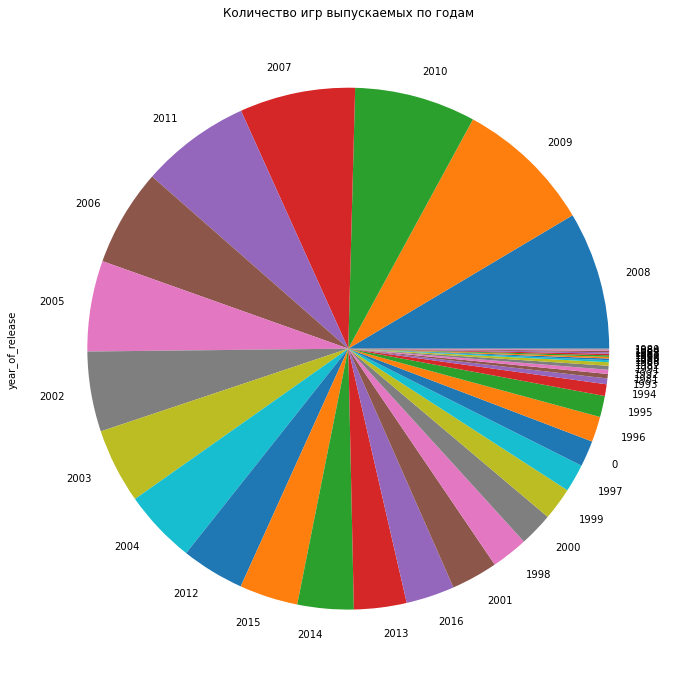

In [43]:
# посмотрим сколько игр выпускалось в разные года

(data['year_of_release'].value_counts()
                        .sort_values(ascending=False)
                        .plot(kind='pie',
                              figsize=(12, 12),
                              title='Количество игр выпускаемых по годам')
)


__Вывод:__

- можно пренебречь данными до 1993 года потому что в тот момент выпускалось не более 100 игр
- мы не будем удалять данные за прошедшие года, потому что в дальнейшем понадобятся данные для оценки ретроспективы


## Шаг 3.2 Самые востребованные платформы <a class='anchor' id='chapter_4_2'></a>

In [46]:
#Посмотрим, как менялись продажи по платформам.
#Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
#Выберем 10 наиболее популярных платформ с точки зрения продаваемых игр

top_sale_platforms = (data.groupby(['platform'])['sum_sales']
                         .agg(['sum'])
                         .sort_values(['sum'], ascending=False)
                         .head(10))

display(top_sale_platforms)

,sum
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [47]:
# построим таблицу с распределением по годам и платформам для наиболее прибыльных платформ

top_sale_platforms_by_years = pd.pivot_table(data.query('platform in @top_sale_platforms.index'),
                                             values=['sum_sales'],
                                             index=['year_of_release'],
                                             columns=['platform'],
                                             aggfunc=np.sum)
                                            
display(top_sale_platforms_by_years)

sum_sales                                                \
platform               DS    GBA     PC      PS     PS2     PS3     PS4   
year_of_release                                                           
0                    3.34   4.97   3.76    3.28   22.21    8.31     NaN   
1985                 0.02    NaN   0.04     NaN     NaN     NaN     NaN   
1988                  NaN    NaN   0.03     NaN     NaN     NaN     NaN   
1992                  NaN    NaN   3.03     NaN     NaN     NaN     NaN   
1994                  NaN    NaN  12.87    6.03     NaN     NaN     NaN   
1995                  NaN    NaN   4.22   35.96     NaN     NaN     NaN   
1996                  NaN    NaN  10.58   94.70     NaN     NaN     NaN   
1997                  NaN    NaN  11.27  136.17     NaN     NaN     NaN   
1998                  NaN    NaN   3.26  169.49     NaN     NaN     NaN   
1999                  NaN    NaN   4.74  144.53     NaN     NaN     NaN   
2000                  NaN   0.07   4.66   96.37   39.17     NaN     NaN   
2001                  NaN  61.53   5.47   35.59  166.43     NaN     NaN   
2002                  NaN  74.16   8.57    6.67  205.38     NaN     NaN   
2003                  NaN  56.67   8.84    2.07  184.31     NaN     NaN   
2004                17.27  77.91  10.39     NaN  211.81     NaN     NaN   
2005               130.14  33.86   4.37     NaN  160.66     NaN     NaN   
2006               119.81   5.28   2.85     NaN  103.42   20.96     NaN   
2007               146.94   3.40   9.28     NaN   75.99   73.19     NaN   
2008               145.31    NaN  12.42     NaN   53.90  118.52     NaN   
2009               119.54    NaN  16.91     NaN   26.40  130.93     NaN   
2010                85.02    NaN  24.28     NaN    5.64  142.17     NaN   
2011                26.18    NaN  35.03     NaN    0.45  156.78     NaN   
2012                11.01    NaN  23.22     NaN     NaN  107.36     NaN   
2013                 1.54    NaN  12.38     NaN     NaN  113.25   25.99   
2014                  NaN    NaN  13.28     NaN     NaN   47.76  100.00   
2015                  NaN    NaN   8.52     NaN     NaN   16.82  118.90   
2016                  NaN    NaN   5.25     NaN     NaN    3.60   69.25   

                                        
platform           PSP     Wii    X360  
year_of_release                         
0                 4.52   16.33   10.18  
1985               NaN     NaN     NaN  
1988               NaN     NaN     NaN  
1992               NaN     NaN     NaN  
1994               NaN     NaN     NaN  
1995               NaN     NaN     NaN  
1996               NaN     NaN     NaN  
1997               NaN     NaN     NaN  
1998               NaN     NaN     NaN  
1999               NaN     NaN     NaN  
2000               NaN     NaN     NaN  
2001               NaN     NaN     NaN  
2002               NaN     NaN     NaN  
2003               NaN     NaN     NaN  
2004              7.06     NaN     NaN  
2005             43.84     NaN    8.25  
2006             55.32  137.15   51.62  
2007             46.93  152.77   95.41  
2008             34.55  171.32  135.26  
2009             37.78  206.97  120.29  
2010             35.04  127.95  170.03  
2011             17.82   59.65  143.84  
2012              7.69   21.71   99.74  
2013              3.14    8.59   88.58  
2014              0.24    3.75   34.74  
2015              0.12    1.14   11.96  
2016               NaN    0.18    1.52

<AxesSubplot:title={'center':'Распределение суммарных продаж игр на популярных платформах'}, xlabel='year_of_release'>

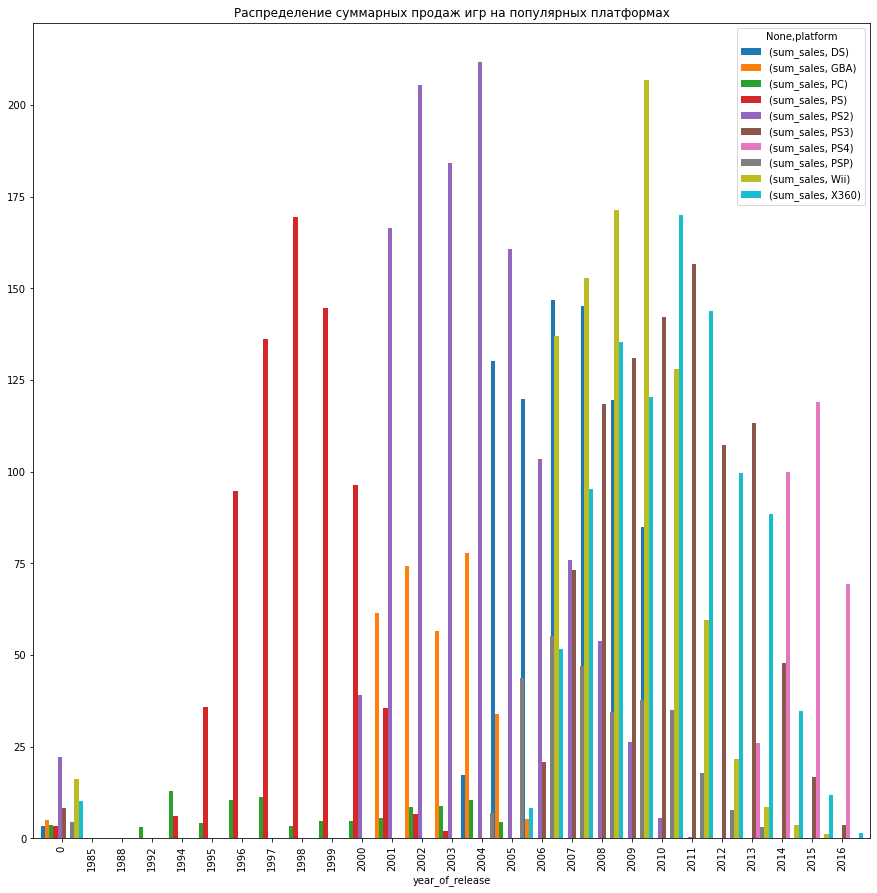

In [50]:
# Построим распределение 

display(top_sale_platforms_by_years.plot(kind='bar',
                                         figsize=(15, 15),
                                         width=1.4,
                                         title='Распределение суммарных продаж игр на популярных платформах')
       )

__теперь определим за какой характерный срок появляются новые и исчезают старые платформы?__

Судя по графику выше можно сделать вывод что в среднем платформы живут в районе 10 лет и их пик приходитс на 4-5 года существования когда происходит наибольший приток новых пользователей

## Шаг 3.3 Актуальный период <a class='anchor' id='chapter_4_3'></a>

При условии что данные есть за 2016 год можно сказать что актуальный период это 2015-2016 год.

На основании данных за эти периоды построим прогноз на 2017 год

__Теперь определим платформы которые лидируют, а также определим их тренд__

sum_sales                                                \
platform              3DS    PC    PS3     PS4   PSP   PSV   Wii   WiiU   
year_of_release                                                           
2015                27.78  8.52  16.82  118.90  0.12  6.25  1.14  16.35   
2016                15.14  5.25   3.60   69.25   NaN  4.25  0.18   4.60   

                               
platform          X360   XOne  
year_of_release                
2015             11.96  60.14  
2016              1.52  26.15

<AxesSubplot:title={'center':'Объем продаж игр за 2015-2016 на популярных платформах'}, xlabel='year_of_release'>

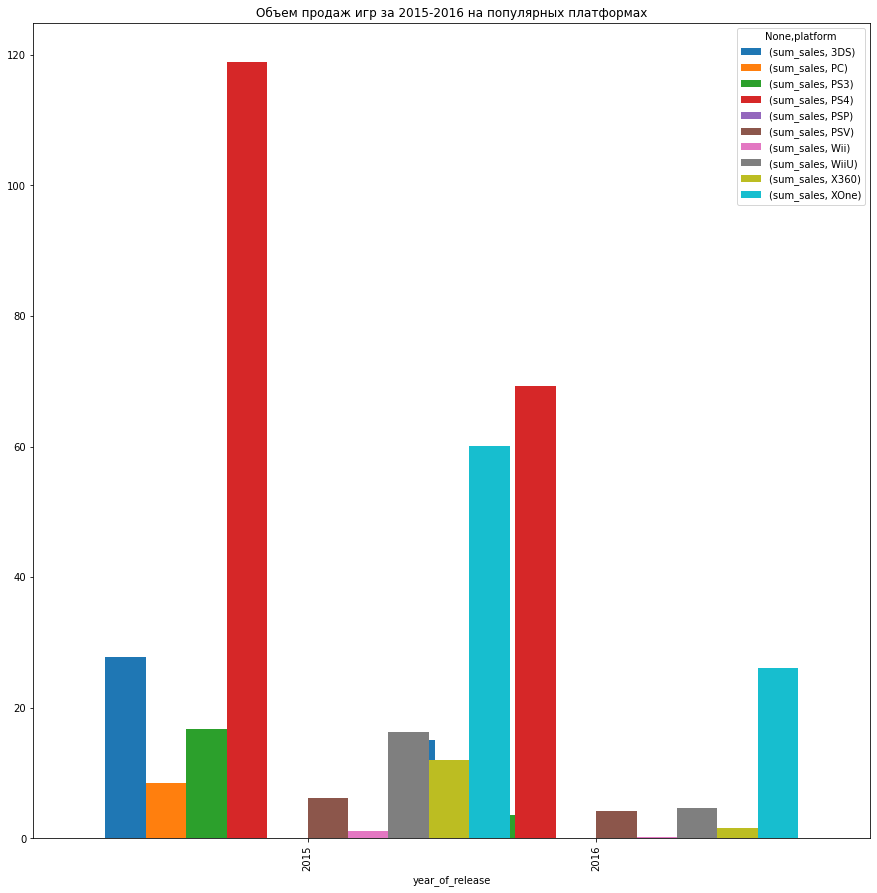

In [53]:
# для проверки актуальных платформ помимо объемов продаж игр на них проверим весь датафрейм за актуальный период

#выберем 30 платформ с наибольшими продажами

top_sale_platforms_actual = data.groupby(['platform'])['sum_sales']\
.agg(['sum'])\
.sort_values(['sum'], ascending=False)\
.head(30)

# для того чтобы сказать что они актуальны мы будем использовать только актуальный период 2015-2016 года

top_sale_platforms_by_years_actual = pd.pivot_table(data.query('platform in @top_sale_platforms_actual.index')
                                                    .query('year_of_release ==[2015, 2016]'),
                                                            values=['sum_sales'],
                                                            index=['year_of_release'],
                                                            columns=['platform'],
                                                            aggfunc=np.sum)
                                            
display(top_sale_platforms_by_years_actual)

display(top_sale_platforms_by_years_actual.plot(kind='bar',
                                                figsize=(15, 15),
                                                width=1.4,
                                                title='Объем продаж игр за 2015-2016 на популярных платформах')
       )

__Потенциально прибыльные платформы__:
   - 3DS
   - PC
   - PS4
   - XOne
   - PS3


sum_sales                              
platform              3DS     PC     PS3     PS4   XOne
year_of_release                                        
2012                51.36  23.22  107.36     NaN    NaN
2013                56.57  12.38  113.25   25.99  18.96
2014                43.76  13.28   47.76  100.00  54.07
2015                27.78   8.52   16.82  118.90  60.14
2016                15.14   5.25    3.60   69.25  26.15

<AxesSubplot:title={'center':'Объем продаж игр на ТОП-5 платформах за последние 5 лет'}, xlabel='year_of_release'>

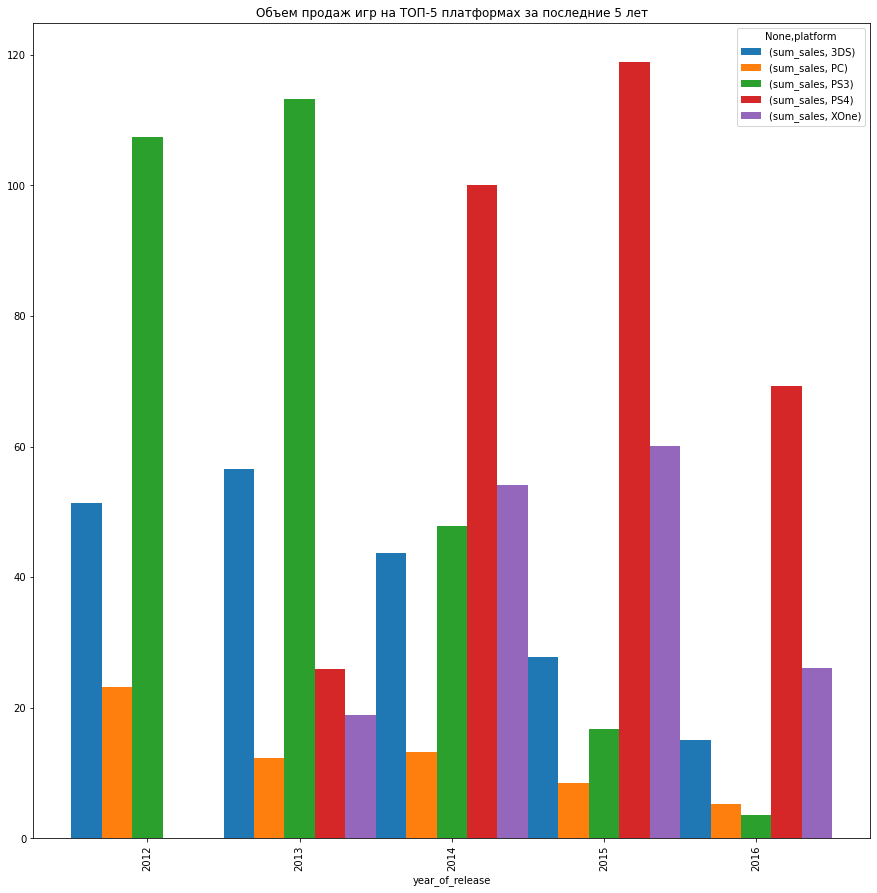

In [55]:
#Определим их тренд построив графики за последние 5 лет

top_sale_platforms_by_years_potential = pd.pivot_table(data.query('platform == ["3DS", "PS4", "PC", "XOne", "PS3"]')
                                                    .query('year_of_release ==[2012, 2013, 2014, 2015, 2016]'),
                                             values=['sum_sales'],
                                             index=['year_of_release'],
                                             columns=['platform'],
                                             aggfunc=np.sum)
                                            
display(top_sale_platforms_by_years_potential)

display(top_sale_platforms_by_years_potential.plot(kind='bar',
                                                   figsize=(15, 15),
                                                   width=1,
                                                   title='Объем продаж игр на ТОП-5 платформах за последние 5 лет'))

__Тренды потенциально прибыльных платформ__:
   - 3DS - нисходящий
   - PC - нисходящий
   - PS4 - восходящий
   - Xone - восходящий
   - PS3 - нисходящий

## Шаг 3.4 Построение усов <a class="anchor" id="chapter_4_4"></a>

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Набор этих платформ мы определили в предыдущем пункте.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,0,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,0,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


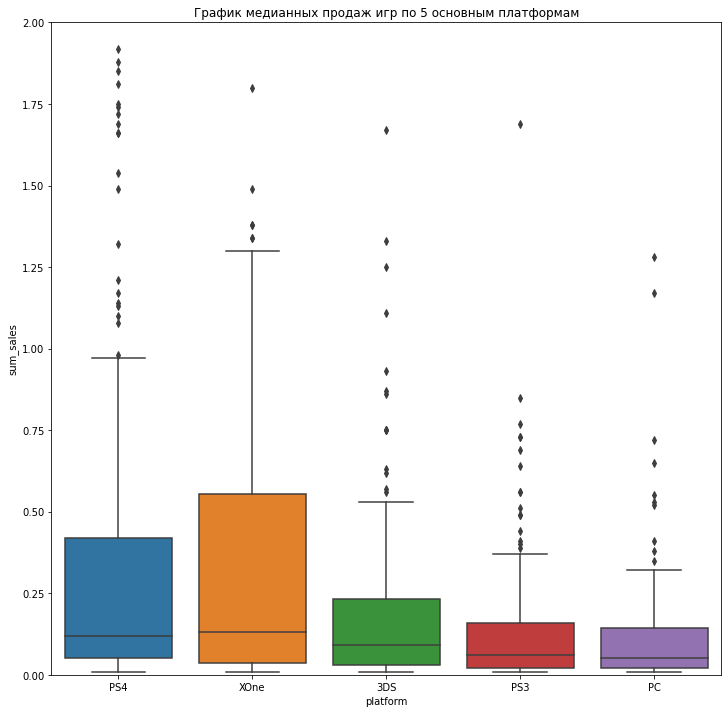

In [60]:
# создадим таблицу с перспективными платформами за 2015-2016 года

most_interesting_platforms = data.loc[data['platform'].isin(["3DS", "PS4", "PC", "XOne", "PS3"])&
                                     data['year_of_release'].isin([2015, 2016])]
#построим графики

plt.figure(figsize=(12, 12))
plt.ylim([0, 2])

sns.boxplot(data=most_interesting_platforms,
            x='platform',
            y='sum_sales')
plt.title('График медианных продаж игр по 5 основным платформам')

display(most_interesting_platforms.head((6)))

__Вывод:__
- Ввиду того что платформы PS4 и Xone имеют восходящий тренд то и медианное значение у них будет больше чем у остальных платформ
- На платформе PS4 много выбросов, что скорее всего говорит о том что некоторые играы "заходят" пользователям хорошо, а также есть  большое количество игр которые "не заходят"

## Шаг 3.5 Корреляция между отзывами и продажами <a class="anchor" id="chapter_4_5"></a>

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

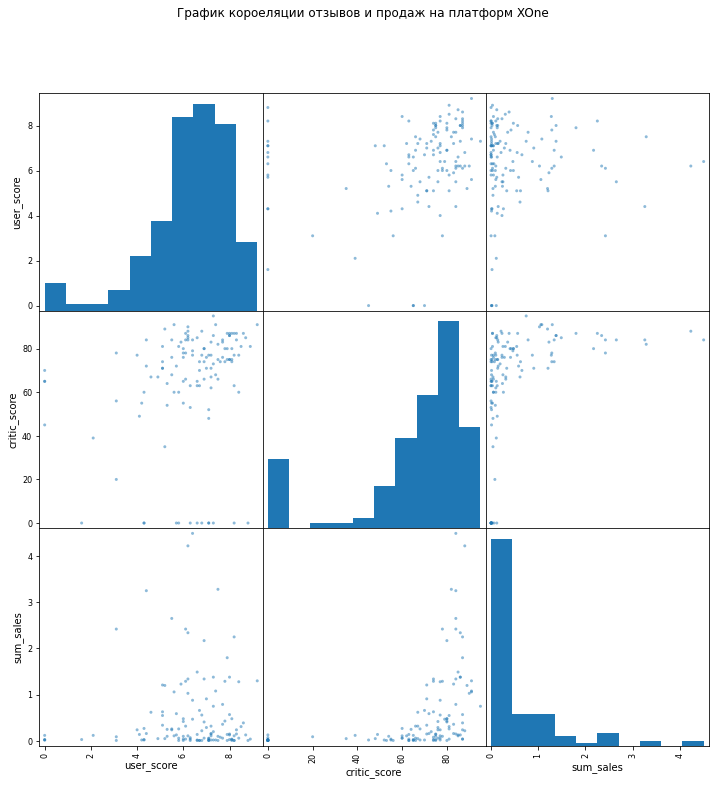

,user_score,critic_score,sum_sales
user_score,1.00,0.24,0.04
critic_score,0.24,1.00,0.38
sum_sales,0.04,0.38,1.00


In [67]:
# построим диаграмму рассеяния для платформы Xone как одной из самых перспективных

#сравним оценки критиков и продажи в разных регионах

#при оценке воздействия уберем нулевые оценки потому что они будут искусственно уменьшать корреляцию 

pd.plotting.scatter_matrix(most_interesting_platforms.query('user_score != 0|critic_score!=0')
                                                    .query('platform == "XOne"')
                                                    .loc[:, ['user_score','critic_score', 'sum_sales']],
                                                    figsize=(12, 12))
plt.suptitle('График короеляции отзывов и продаж на платформ XOne')
plt.show()
display(most_interesting_platforms.query('user_score != 0|critic_score!=0')
                                   .query('platform == "XOne"')
                                   .loc[:, ['user_score','critic_score', 'sum_sales']]
                                   .corr()
                                   .round(2))

__вывод:__

- Корреляция между оценками пользователей и суммарнными продажами ничтожно мала, а значит не имеет значения
- Зависимость оценки критиков выше чем у оценки пользователей и близка к среднему уровню, а значит можно сказать что оценки критиков имеют небольшое влияние на продажи игр. Это может говорить о том что пользователи опираются на оценки критиков при покупке игр на платформе

__Оценим корреляцию оценок игр и их суммарных продаж с  остальными перспективными платформами__

'Игровая платформа PS4'

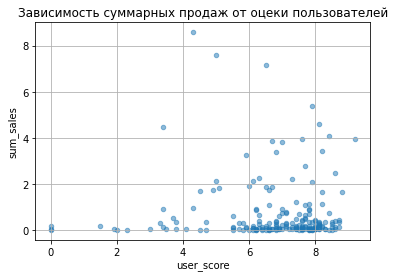

'коэффициент Пирсона'

-0.02

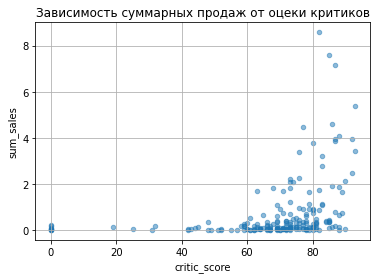

'коэффициент Пирсона'

0.33

'Игровая платформа 3DS'

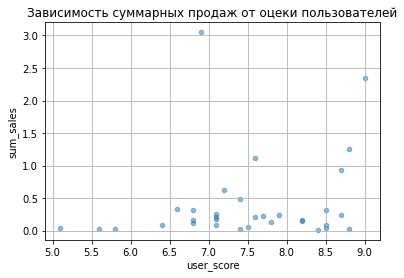

'коэффициент Пирсона'

0.2

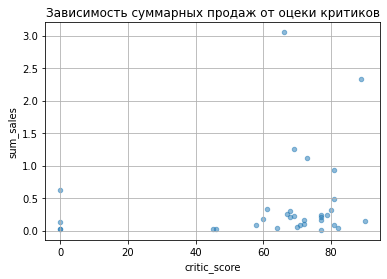

'коэффициент Пирсона'

0.18

'Игровая платформа PS3'

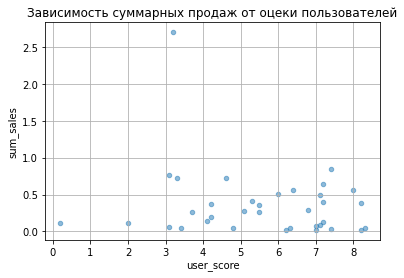

'коэффициент Пирсона'

-0.17

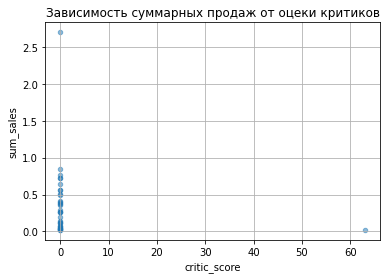

'коэффициент Пирсона'

-0.13

'Игровая платформа PC'

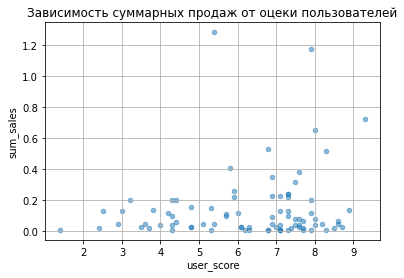

'коэффициент Пирсона'

0.15

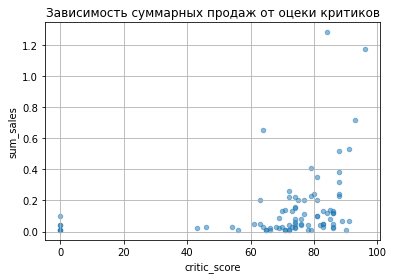

'коэффициент Пирсона'

0.29

In [23]:
# для этого напишем цикл который будет отфильтровывать 
# и строить графики с корреляцией для каждой платформы отдельно

PS4 = most_interesting_platforms.query('user_score != 0|critic_score!=0')\
                               .query('platform == "PS4"')\
                               .reset_index()
                               

ЗDS = most_interesting_platforms.query('user_score != 0|critic_score!=0')\
                               .query('platform == "3DS"')\
                               .reset_index()

PS3 = most_interesting_platforms.query('user_score != 0|critic_score!=0')\
                               .query('platform == "PS3"')\
                               .reset_index()             

PC = most_interesting_platforms.query('user_score != 0|critic_score!=0')\
                               .query('platform == "PC"')\
                               .reset_index()

for index in [PS4, ЗDS, PS3, PC]:
    
    platform_name = index.loc[0,'platform']
    display(f'Игровая платформа {platform_name}')
    
    index.plot(x='user_score',
        y='sum_sales',
        kind='scatter',
        alpha=0.5,
        grid=True)
                                       
    plt.title('Зависимость суммарных продаж от оцеки пользователей')
    plt.show()

    display("коэффициент Пирсона")
    display(index['user_score'].corr(index['sum_sales']).round(2))



    index.plot(x='critic_score',
        y='sum_sales',
        kind='scatter',
        alpha=0.5,
        grid=True)
                                       
    plt.title('Зависимость суммарных продаж от оцеки критиков')
    plt.show()

    display("коэффициент Пирсона")
    display(index['critic_score'].corr(index['sum_sales']).round(2))

__Вывод:__

- У всех игорвых платформ кроме PS3 прослеживается средняя зависимость оценки критиков от суммарных продаж игр , это подтверждает ранее сделанный вывод по платформе XOne

## Шаг 3.6 Прибыльные жанры <a class="anchor" id="chapter_4_6"></a>

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

будем использовать медианное значение продаж по жанру чтобы избежать влияния выбросов (при среднем)

genre
Shooter         0.380
Sports          0.120
Role-Playing    0.115
Platform        0.100
Simulation      0.100
Fighting        0.090
Action          0.060
Misc            0.060
Racing          0.055
Strategy        0.050
Adventure       0.030
Puzzle          0.030
Name: sum_sales, dtype: float64

<AxesSubplot:title={'center':'Наиболее прибыльные жанры игр за 2015-2016 годы'}, ylabel='sum_sales'>

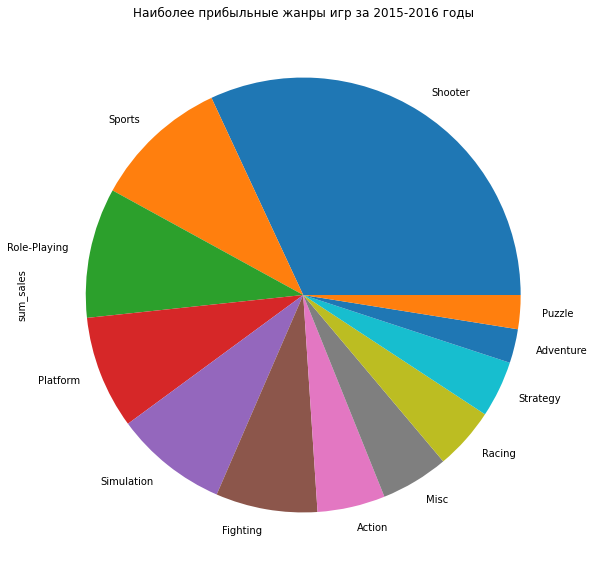

In [68]:
#составим распределение жанров по медианной прибыльности за 2015-2016 года

display(data
        .query('year_of_release in [2015, 2016]')
        .groupby(['genre'])['sum_sales']
        .agg('median')
        .sort_values(ascending=False))

display(data
        .query('year_of_release in [2015, 2016]')
        .groupby(['genre'])['sum_sales']
        .agg('median')
        .sort_values(ascending=False)
        .plot(
              kind='pie',
              figsize=(10,10),
              title='Наиболее прибыльные жанры игр за 2015-2016 годы'))

__Вывод:__

- Наиболее прибыльные жанры это шутеры, экшены, спортивные и ролевые игры
- Наименьшим спросом пользуются игры в которых необходимо потратить больше времени на освоение игровой механики, такие как симуляторы, гонки и стратегии
- Также возможно такие продажи позволяют делать онлайн режимы, позволяющие играть большому количеству игроков онлайн

# Шаг 4. Портрет пользователя по каждому региону <a class="anchor" id="chapter_5"></a>

- Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


## Шаг 4.1 Топ-5 платформ <a class="anchor" id="chapter_5_1"></a>

Определим самые популярные платформы для каждого региона

для этого выберем для каждого региона наиболее продаваемые платформы и добавим столбцы, чтобы оценить доли

In [25]:
# Вычислим топ-5 платформ для северной америки(NA)

na_platforms = pd.pivot_table(data.loc[data['year_of_release'].isin([2015, 2016])],
                                  index=['platform'],
                                  values=['na_sales'],
                                  aggfunc='sum')\
                    .sort_values('na_sales',ascending=False)

# сформируем список из 5 наиболее популярных платформ

top_5_na = na_platforms.head(5).index

display(top_5_na)

# создадим столбец в котором переопределим занчение платформ не из топ-5 в категорию "другие"

na_platforms.reset_index(inplace=True)

na_platforms['top_platform'] = na_platforms['platform']

na_platforms.loc[~na_platforms['top_platform'].isin(top_5_na),['top_platform']] = 'Other'

display(na_platforms)

#сгруппируем заново по платформам датафрейм

na_platforms = na_platforms\
        .set_index('top_platform')\
        .groupby(['top_platform'])['na_sales']\
        .agg('sum')\
        .sort_values(ascending=False)

display(na_platforms)

Index(['PS4', 'XOne', '3DS', 'WiiU', 'X360'], dtype='object', name='platform')

,platform,na_sales,top_platform
0,PS4,63.86,PS4
1,XOne,50.30,XOne
2,3DS,10.31,3DS
3,WiiU,8.86,WiiU
4,X360,8.05,X360
5,PS3,5.66,Other
6,PC,3.72,Other
7,PSV,0.54,Other
8,Wii,0.49,Other
9,PSP,0.00,Other


top_platform
PS4      63.86
XOne     50.30
Other    10.41
3DS      10.31
WiiU      8.86
X360      8.05
Name: na_sales, dtype: float64

Таким образом мы вычислили что топ 5 платформ в Северной Америке за актуальный период это:
- PS4
- XOne
- 3DS
- WiiU
- x360

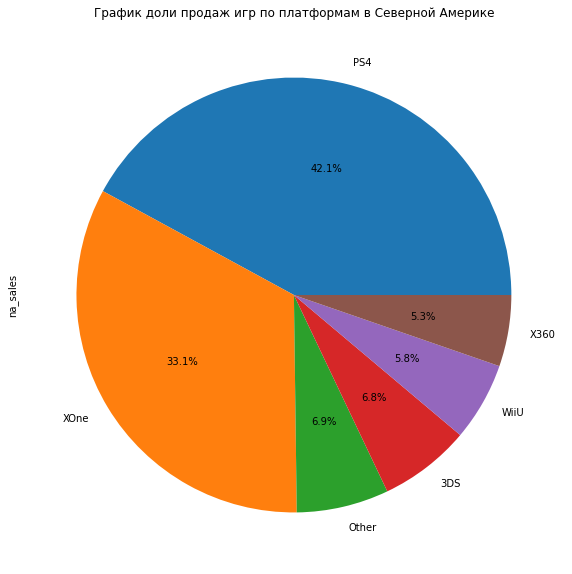

In [73]:
# построим распределение топ-5 платформ в Северной Америке в долях

na_platforms.plot(kind='pie'
                  ,y='na_sales'
                  ,figsize=(10, 10)
                  ,autopct= '%1.1f%%'
                  ,title='График доли продаж игр по платформам в Северной Америке')


plt.show()

Index(['PS4', 'XOne', 'PC', '3DS', 'PS3'], dtype='object', name='platform')

,platform,eu_sales,top_platform
0,PS4,83.54,PS4
1,XOne,28.10,XOne
2,PC,9.10,PC
3,3DS,7.39,3DS
4,PS3,7.30,PS3
5,WiiU,6.49,Other
6,X360,4.21,Other
7,PSV,1.08,Other
8,Wii,0.73,Other
9,PSP,0.00,Other


top_platform
PS4      83.54
XOne     28.10
Other    12.51
PC        9.10
3DS       7.39
PS3       7.30
Name: eu_sales, dtype: float64

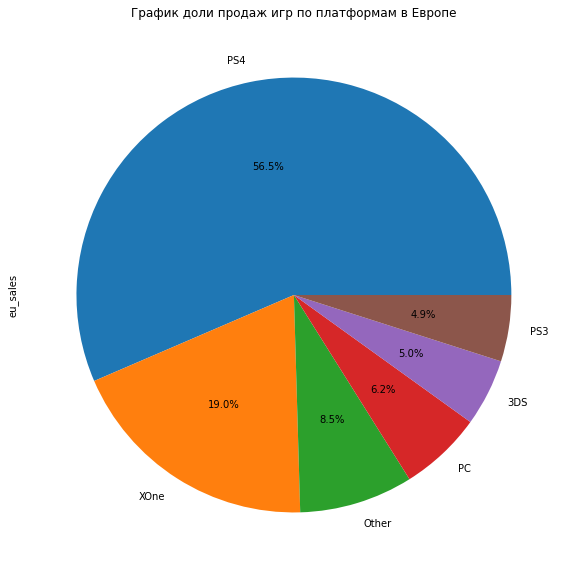

In [74]:
# Вычислим топ-5 платформ для европы(EU)


eu_platforms = pd.pivot_table(data.loc[data['year_of_release'].isin([2015, 2016])],
                                  index=['platform'],
                                  values=['eu_sales'],
                                  aggfunc='sum')\
                    .sort_values('eu_sales',ascending=False)

# сформируем список из 5 наиболее популярных платформ

top_5_eu = eu_platforms.head(5).index

display(top_5_eu)

# создадим столбец в котором переопределим занчение платформ не из топ-5 в категорию "другие"

eu_platforms.reset_index(inplace=True)

eu_platforms['top_platform'] = eu_platforms['platform']

eu_platforms.loc[~eu_platforms['top_platform'].isin(top_5_eu),['top_platform']] = 'Other'

display(eu_platforms)

#сгруппируем заново по платформам датафрейм

eu_platforms = eu_platforms\
        .set_index('top_platform')\
        .groupby(['top_platform'])['eu_sales']\
        .agg('sum')\
        .sort_values(ascending=False)

display(eu_platforms)

# построим распределение топ-5 платформ в долях

eu_platforms.plot(kind='pie'
                  ,y='eu_sales'
                  ,figsize=(10, 10)
                  ,autopct= '%1.1f%%'
                  ,title='График доли продаж игр по платформам в Европе')


plt.show()

Index(['3DS', 'PS4', 'PSV', 'PS3', 'WiiU'], dtype='object', name='platform')

,platform,jp_sales,top_platform
0,3DS,23.55,3DS
1,PS4,12.05,PS4
2,PSV,8.41,PSV
3,PS3,4.97,PS3
4,WiiU,4.12,WiiU
5,XOne,0.18,Other
6,PSP,0.12,Other
7,PC,0.00,Other
8,Wii,0.00,Other
9,X360,0.00,Other


top_platform
3DS      23.55
PS4      12.05
PSV       8.41
PS3       4.97
WiiU      4.12
Other     0.30
Name: jp_sales, dtype: float64

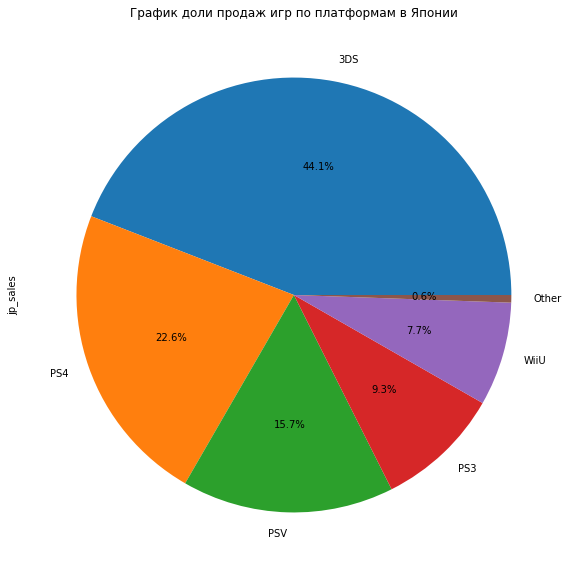

In [75]:
# Вычислим топ-5 платформ для японии(JP)


jp_platforms = pd.pivot_table(data.loc[data['year_of_release'].isin([2015, 2016])],
                                  index=['platform'],
                                  values=['jp_sales'],
                                  aggfunc='sum')\
                    .sort_values('jp_sales',ascending=False)

# сформируем список из 5 наиболее популярных платформ

top_5_jp = jp_platforms.head(5).index

display(top_5_jp)

# создадим столбец в котором переопределим занчение платформ не из топ-5 в категорию "другие"

jp_platforms.reset_index(inplace=True)

jp_platforms['top_platform'] = jp_platforms['platform']

jp_platforms.loc[~jp_platforms['top_platform'].isin(top_5_jp),['top_platform']] = 'Other'

display(jp_platforms)

#сгруппируем заново по платформам датафрейм

jp_platforms = jp_platforms\
        .set_index('top_platform')\
        .groupby(['top_platform'])['jp_sales']\
        .agg('sum')\
        .sort_values(ascending=False)

display(jp_platforms)

# построим распределение топ-5 платформ в долях

jp_platforms.plot(kind='pie'
                  ,y='jp_sales'
                  ,figsize=(10, 10)
                  ,autopct= '%1.1f%%'
                  ,title='График доли продаж игр по платформам в Японии')


plt.show()

__вывод:__

- В северной америке и европе самая популярная платформа PS4, а в японии 3DS, видимо японцы довольно патриотичны и предпочитают остальным свою платфому Nintendo
- в северной америке и европе основную конкуренцию PS4 соствляет XOne и вместе они составляют более 70%
- в отличии от европы и северной америки где "остальные" платформы не из списка топ-5 занимают не менее 5% рынка в японии непопулярных платформ менее 1%, что говорит о том что весь рынок поделили между собой Nintendo c двумя платформами и Play Station c 3 платформами

## Шаг 4.2 Топ-5 жанров <a class="anchor" id="chapter_5_2"></a>

определим топ-5 жанров для каждого рынка

In [29]:
# Вычислим топ-5 жанров для северной америки(NA)

na_genre = pd.pivot_table(data.loc[data['year_of_release'].isin([2015, 2016])],
                                  index=['genre'],
                                  values=['na_sales'],
                                  aggfunc='sum')\
                    .sort_values('na_sales',ascending=False)

# сформируем список из 5 наиболее популярных жанров

top_5_na_genre = na_genre.head(5).index

display(top_5_na_genre)

# создадим столбец в котором переопределим занчение жанров не из топ-5 в категорию "другие"

na_genre.reset_index(inplace=True)

na_genre['top_genre'] = na_genre['genre']

na_genre.loc[~na_genre['top_genre'].isin(top_5_na_genre),['top_genre']] = 'Other'

display(na_genre)

#сгруппируем заново по жанрам датафрейм

na_genre = na_genre\
        .set_index('top_genre')\
        .groupby(['top_genre'])['na_sales']\
        .agg('sum')\
        .sort_values(ascending=False)

display(na_genre)

Index(['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')

,genre,na_sales,top_genre
0,Shooter,48.18,Shooter
1,Action,33.68,Action
2,Sports,26.31,Sports
3,Role-Playing,19.82,Role-Playing
4,Misc,5.58,Misc
5,Fighting,5.54,Other
6,Adventure,3.84,Other
7,Platform,3.78,Other
8,Racing,2.82,Other
9,Simulation,1.36,Other


top_genre
Shooter         48.18
Action          33.68
Sports          26.31
Role-Playing    19.82
Other           18.22
Misc             5.58
Name: na_sales, dtype: float64

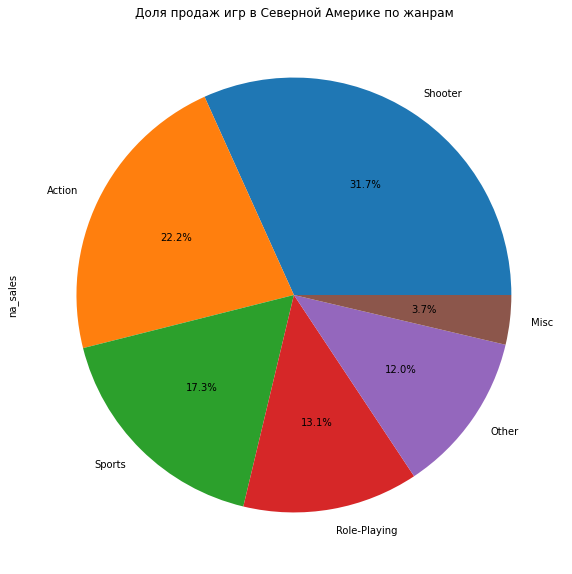

In [76]:
# построим распределение топ-5 жанров в долях

na_genre.plot(kind='pie'
                  ,y='na_sales'
                  ,figsize=(10, 10)
                  ,autopct= '%1.1f%%'
                  ,title='Доля продаж игр в Северной Америке по жанрам')


plt.show()

Index(['Shooter', 'Action', 'Sports', 'Role-Playing', 'Racing'], dtype='object', name='genre')

,genre,eu_sales,top_genre
0,Shooter,40.28,Shooter
1,Action,34.82,Action
2,Sports,27.82,Sports
3,Role-Playing,17.21,Role-Playing
4,Racing,6.52,Racing
5,Adventure,4.67,Other
6,Misc,4.26,Other
7,Simulation,3.74,Other
8,Fighting,3.72,Other
9,Platform,3.20,Other


top_genre
Shooter         40.28
Action          34.82
Sports          27.82
Other           21.29
Role-Playing    17.21
Racing           6.52
Name: eu_sales, dtype: float64

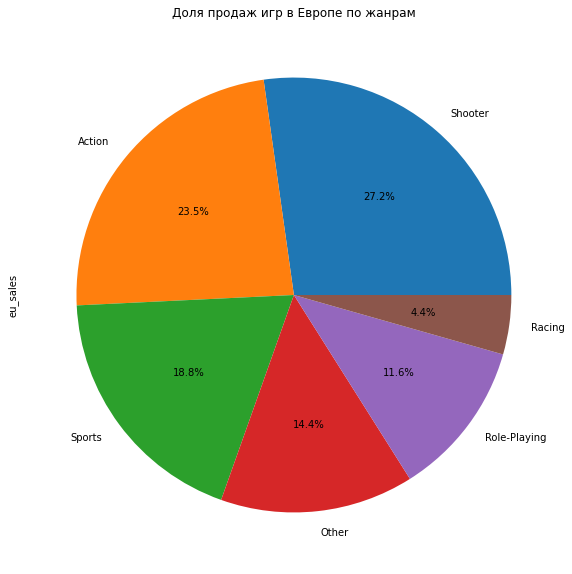

In [77]:
# Вычислим топ-5 платформ для европы(EU)


eu_genre = pd.pivot_table(data.loc[data['year_of_release'].isin([2015, 2016])],
                                  index=['genre'],
                                  values=['eu_sales'],
                                  aggfunc='sum')\
                    .sort_values('eu_sales',ascending=False)

# сформируем список из 5 наиболее популярных жанров

top_5_eu_genre = eu_genre.head(5).index

display(top_5_eu_genre)

# создадим столбец в котором переопределим занчение жанров не из топ-5 в категорию "другие"

eu_genre.reset_index(inplace=True)

eu_genre['top_genre'] = eu_genre['genre']

eu_genre.loc[~eu_genre['top_genre'].isin(top_5_eu_genre),['top_genre']] = 'Other'

display(eu_genre)

#сгруппируем заново по жанрам датафрейм

eu_genre = eu_genre\
        .set_index('top_genre')\
        .groupby(['top_genre'])['eu_sales']\
        .agg('sum')\
        .sort_values(ascending=False)

display(eu_genre)

# построим распределение топ-5 платформ в долях

eu_genre.plot(kind='pie'
                  ,y='eu_sales'
                  ,figsize=(10, 10)
                  ,autopct= '%1.1f%%'
                  ,title='Доля продаж игр в Европе по жанрам')


plt.show()

Index(['Action', 'Role-Playing', 'Shooter', 'Misc', 'Adventure'], dtype='object', name='genre')

,genre,jp_sales,top_genre
0,Action,23.05,Action
1,Role-Playing,13.41,Role-Playing
2,Shooter,3.79,Shooter
3,Misc,3.19,Misc
4,Adventure,2.22,Adventure
5,Simulation,1.93,Other
6,Sports,1.65,Other
7,Fighting,1.54,Other
8,Platform,1.42,Other
9,Puzzle,0.52,Other


top_genre
Action          23.05
Role-Playing    13.41
Other            7.74
Shooter          3.79
Misc             3.19
Adventure        2.22
Name: jp_sales, dtype: float64

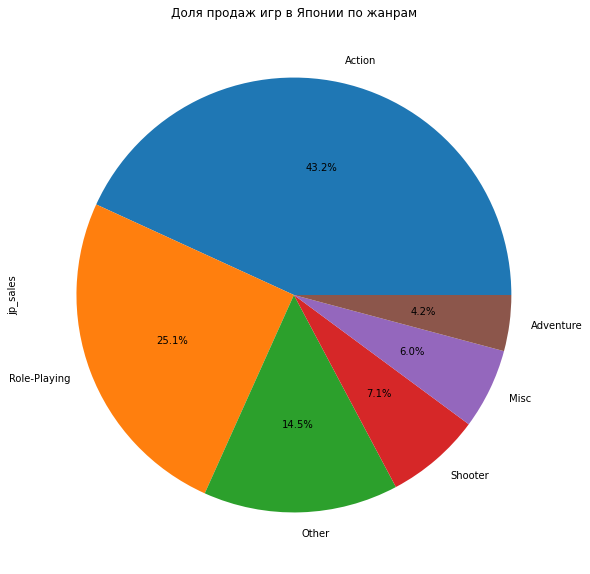

In [78]:
# Вычислим топ-5 платформ для японии(JP)


jp_genre = pd.pivot_table(data.loc[data['year_of_release'].isin([2015, 2016])],
                                  index=['genre'],
                                  values=['jp_sales'],
                                  aggfunc='sum')\
                    .sort_values('jp_sales',ascending=False)

# сформируем список из 5 наиболее популярных жанров

top_5_jp_genre = jp_genre.head(5).index

display(top_5_jp_genre)

# создадим столбец в котором переопределим занчение жанров не из топ-5 в категорию "другие"

jp_genre.reset_index(inplace=True)

jp_genre['top_genre'] = jp_genre['genre']

jp_genre.loc[~jp_genre['top_genre'].isin(top_5_jp_genre),['top_genre']] = 'Other'

display(jp_genre)

#сгруппируем заново по жанрам датафрейм

jp_genre = jp_genre\
        .set_index('top_genre')\
        .groupby(['top_genre'])['jp_sales']\
        .agg('sum')\
        .sort_values(ascending=False)

display(jp_genre)

# построим распределение топ-5 платформ в долях

jp_genre.plot(kind='pie'
                  ,y='jp_sales'
                  ,figsize=(10, 10)
                  ,autopct= '%1.1f%%'
                  ,title='Доля продаж игр в Японии по жанрам')


plt.show()

__вывод:__

- Распределение в Северной Америке и в Европе близко, топ-3 экшена совпадают и это: шутеры, экшены и спортивные игры
- В Японии экшен игры наиболее популярны  как и ролевые игры, но есть ключевое отличие в том что почти половину рынка занимаеют именно экшены, тогда как в других регионах распределение в долях внутри топ-5 более равномерное

## Шаг 4.3 влияние рейтинга ESRB <a class="anchor" id="chapter_5_3"></a>



In [33]:
# Вычислим доли продаж с разным рейтингом для северной америки


na_esrb_rating = pd.pivot_table(data.loc[data['year_of_release'].isin([2015, 2016])],
                                  index=['rating'],
                                  values=['na_sales'],
                                  aggfunc='sum')\
                    .sort_values('na_sales',ascending=False)

display(na_esrb_rating)

,na_sales
rating,
M,47.03
0,37.44
E,26.59
T,22.86
E10+,17.87


 воспользовавшись википедией теперь мы знаем что:
- M - рейтинг для игр от 17 лет и старше
- E - рейтинг для игр любых возрастов (Every)
- T - рейтинг для игр от 13 лет и старше
- E10+ - рейтинг для игр от 10 лет
- 0 - значит игра не имеет оценку ESRB

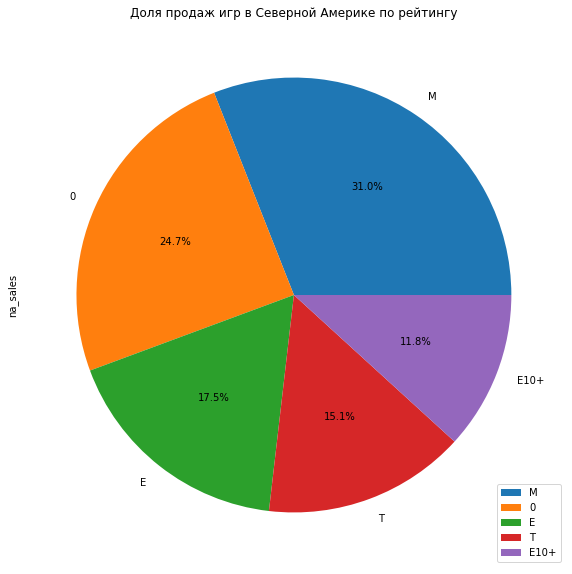

In [79]:
# построиг график с определением долей для каждого рейтинга

na_esrb_rating.plot(kind='pie'
                  ,y='na_sales'
                  ,figsize=(10, 10)
                  ,autopct= '%1.1f%%'
                  ,title='Доля продаж игр в Северной Америке по рейтингу')


plt.show()

,eu_sales
rating,
M,45.54
0,35.71
E,34.83
T,20.32
E10+,11.54


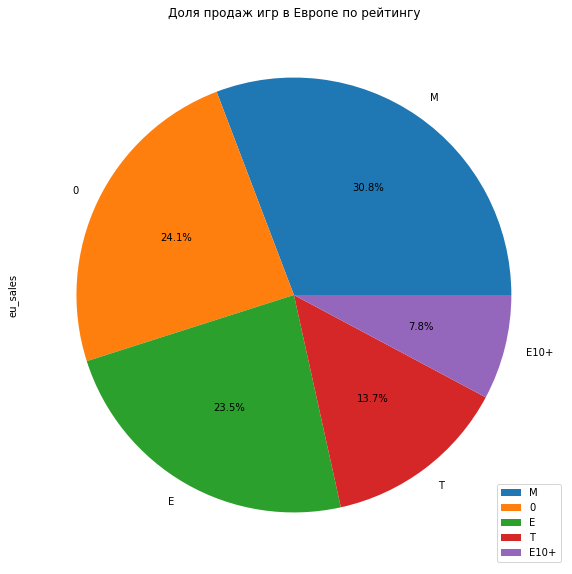

In [80]:
# Вычислим доли продаж с разным рейтингом для северной европы


eu_esrb_rating = pd.pivot_table(data.loc[data['year_of_release'].isin([2015, 2016])],
                                  index=['rating'],
                                  values=['eu_sales'],
                                  aggfunc='sum')\
                    .sort_values('eu_sales',ascending=False)

display(eu_esrb_rating)

# построиг график с определением долей для каждого рейтинга

eu_esrb_rating.plot(kind='pie'
                  ,y='eu_sales'
                  ,figsize=(10, 10)
                  ,autopct= '%1.1f%%'
                  ,title='Доля продаж игр в Европе по рейтингу')


plt.show()

,jp_sales
rating,
0,32.89
T,7.70
E,5.25
M,4.29
E10+,3.27


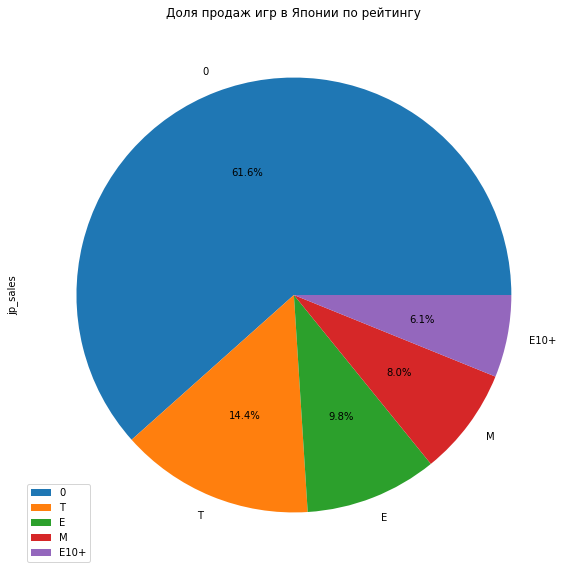

In [81]:
# Вычислим доли продаж с разным рейтингом для северной европы


jp_esrb_rating = pd.pivot_table(data.loc[data['year_of_release'].isin([2015, 2016])],
                                  index=['rating'],
                                  values=['jp_sales'],
                                  aggfunc='sum')\
                    .sort_values('jp_sales',ascending=False)

display(jp_esrb_rating)

# построиг график с определением долей для каждого рейтинга

jp_esrb_rating.plot(kind='pie'
                  ,y='jp_sales'
                  ,figsize=(10, 10)
                  ,autopct= '%1.1f%%'
                  ,title='Доля продаж игр в Японии по рейтингу')


plt.show()

__вывод:__

- В Европе и Северной Америке наличие рейтинга M позволяет продавать большее количество игр, как только пользователи достигают 18 лет они могут играть в эти игры
- В Японии рейтинг ESRB не оказывает сильного влияния и больше половины игр делающих основные продажи не имеют рейтинга
- Выручка по рейтингу SERB имеет одинаковое распределение в Северной Америке и Евроме, что говорит о схожих вкусах аудитории и возможноти применения одинаковых маркетинговых алгоритмов для вывода на рынок новых игр

# Шаг 5. Проверка гепотез <a class="anchot" id="chapter_6"></a>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


для проверки первой гипотезы необходимо сформировать нулевую и альтернативную(двустороннюю) гипотезы:
- H0: Средние пользовательские рейтинги платформ XOne и PC одинаковые
- H1: Средние пользовательсике рейтинги платформ XOne и PC разные

для сравнения будем использовать метод st.ttest_ind потому что мы сравниваем две генеральные совокупности, которые не зависят друг от друга

In [82]:
#зададим уровень значимости для проверки нулевой гепотезы

alpha = 0.1

#проведем статистический тест

results = st.ttest_ind(data.query('year_of_release in [2015, 2016] and platform =="XOne"')['user_score']
                      ,data.query('year_of_release in [2015, 2016] and platform =="PC"')['user_score'])

display(results.pvalue)

if results.pvalue < alpha:
    display('нулевая гипотеза отвергнута, а значит средние пользовательские рейтинги XOne и PC разные')
else:
    display('средние пользовательские рейтинги XOne и PC одинаковые и равны соответственно')
    
display(data.query('year_of_release in [2015, 2016]|platform =="XOne"')['user_score'].mean()
        ,data.query('year_of_release in [2015, 2016]|platform =="PC"')['user_score'].mean())

0.3726755182886019

'средние пользовательские рейтинги XOne и PC одинаковые и равны соответственно'

3.461363636363638

4.360970677451976

__примечание:__ 
- возможно такой результат вызван небольшим количеством данных в генеральной совокупности и как следствие больгим средним отелонением

для проверки второй гипотезы необходимо сформировать нулевую и альтернативную(двустороннюю) гипотезы:
- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports разные

для сравнения будем использовать метод st.ttest_ind потому что мы сравниваем две генеральные совокупности, которые не зависят друг от друга

In [84]:
# задаим средние оценки для жанров Action и Sport
mean_score_Action = data.query('year_of_release in [2015, 2016] and genre =="Action"')['user_score'].mean()
mean_score_Sports = data.query('year_of_release in [2015, 2016] and genre =="Sports"')['user_score'].mean()

#зададим уровень значимости для проверки нулевой гепотезы

alpha = 0.1

#проведем статистический тест

results = st.ttest_ind(data.query('year_of_release in [2015, 2016] and genre =="Action"')['user_score']
                       ,data.query('year_of_release in [2015, 2016] and genre =="Sports"')['user_score'])

display(results.pvalue)

if results.pvalue < alpha:
    display(f'нулевая гипотеза отвергнута, а значит средние пользовательские рейтинги жанров Action {mean_score_Action} и Sports {mean_score_Sports} разные ')

else:
    display('средние пользовательские рейтинги жанров Action и Sports одинаковые')
    


0.010648802104801127

'нулевая гипотеза отвергнута, а значит средние пользовательские рейтинги жанров Action 3.0487238979118305 и Sports 3.9841121495327108 разные '

# Вывод <a class="anchot" id="chapter_7"></a>

- Была произведена предобработка данных где были изменены типы данных и обработаны пропуски некоторых значений
- Далее был произведен EDA где был определен актуальный период на основании которого далее производилась вся аналитика
- Рынки Северной Америки и европы по своим предпочтениям в части игровых платформ и жанров похожи
- В японии рейтинги имеют меньшее значение по сравнению с остальными рынками
- Самые популярные жанры игр это Шутеры, Экшен игры и Спортивные
- Наиболее перспективные и популярные платформы это PS4 и Xone
- Средний срок жизни платформ составляет 10 лет, после чего либо приходит новое поколение либо появляется новая реинкарнация платформы